In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
from stop_words import get_stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
lien = "https://news.google.com/topstories?hl=fr&gl=FR&ceid=FR%3Afr"

In [29]:
page_response = requests.get(lien)
soupe = bs(page_response.content, "html.parser")

In [30]:
blocs = soupe.find_all("article", {"jscontroller": "mhFxVb"})
len(blocs)

163

In [31]:
titres = []
compteur = 0
for bloc in blocs:
    compteur += 1
    titre = bloc.find("a", {"class": "DY5T1d"}).text
    titres.append(titre)
    
    auteur = bloc.find("a", {"class": "wEwyrc AVN2gc uQIVzc Sksgp"}).text
    
    temps = bloc.find("time")
    if temps:
        temps = temps["datetime"][:-1]
        temps = temps.replace("T", " ").split()
        date = temps[0]
        heure = temps[1]
    else:
        date = "--"
        heure = "--"
    
    texte = bloc.find("span", {"class": "xBbh9"})
    
    lien_article = bloc.find("a", {"class": "DY5T1d"})["href"][1:]
    lien_article = "https://news.google.com" + lien_article
    
    
    print("article n°", compteur)
    print(titre)
    print("Par", auteur)
    print("Publié le:", date, "à", heure)
    if texte:
        print("------------")
        print("Extrait :")
        print(texte.text)
    print("------------")
    print("Lien :")
    print(lien_article)
    print("================================================================================================")

article n° 1
Ecoles, masques, quarantaine… à une semaine du déconfinement, les zones de flou subsistent
Par Le Monde
Publié le: 2020-05-04 à 09:24:12
------------
Extrait :
Sur les écoles, de nombreux maires ont fait savoir que celles de leur commune ne rouvriront pas le 11 mai, tandis que le gouvernement assure que la « majorité ...
------------
Lien :
https://news.google.com/articles/CBMijgFodHRwczovL3d3dy5sZW1vbmRlLmZyL3BsYW5ldGUvYXJ0aWNsZS8yMDIwLzA1LzA0L2Vjb2xlcy1tYXNxdWVzLXF1YXJhbnRhaW5lLWEtdW5lLXNlbWFpbmUtZHUtZGVjb25maW5lbWVudC1sZS1mbG91LXN1YnNpc3RlXzYwMzg1ODhfMzI0NC5odG1s0gEA?hl=fr&gl=FR&ceid=FR%3Afr
article n° 2
Déconfinement : la date du 11 mai pourrait être remise en question si le nombre de nouveaux malades est tro...
Par franceinfo
Publié le: 2020-05-03 à 06:43:33
------------
Extrait :
Dans une interview au "Parisien/Aujourd'hui en France", le ministre de la Santé, Olivier Véran, a mis en garde contre un relâchement du respect des mesures de ...
------------
Lien :
https:/

#### Problèmes :
- Limité et filtré par Google (non exhaustif)
- Comment récupérer les liens ??

In [32]:
def nettoyage(x):
    x = x.lower()
    x = re.sub(r"\W", " ", x) # Enleve la ponctuation
    x = re.sub(r"[éèêë]", "e", x)
    x = re.sub(r"[àâäà]", "a", x)
    x = re.sub(r"[ùûü]", "u", x)
    x = re.sub(r"[ôöò]", "o", x)
    x = re.sub(r"  +", " ", x)
    return x

In [33]:
titres_modif = list(map(nettoyage, titres))
titres_modif

['ecoles masques quarantaine a une semaine du deconfinement les zones de flou subsistent',
 'deconfinement la date du 11 mai pourrait etre remise en question si le nombre de nouveaux malades est tro ',
 'deuxieme vague veran s en prend au pr raoult',
 'coronavirus ou en est la situation en france a une semaine du deconfinement ',
 'reservations olivier veran ministre de la sante ne conseille pas d acheter un billet d avion ',
 'coronavirus muriel penicaud estime qu il est raisonnable de dire qu un teletravail massif aura lieu au ',
 'les regles du deconfinement pour les entreprises devoilees',
 'le gouvernement devoile le mode d emploi general du deconfinement en entreprise',
 'deconfinement les mesures strictes imposees au secteur prive',
 'en direct coronavirus la ministre du travail muriel penicaud recommande que le teletravail massif du ',
 'montpellier un gendarme controle une baigneuse c etait une poupee gonflable',
 'herault la baigneuse etait une poupee gonflable les gendarmes 

In [34]:
french_stop_words = get_stop_words('french')

In [35]:
titres_modif = " ".join(titres_modif)

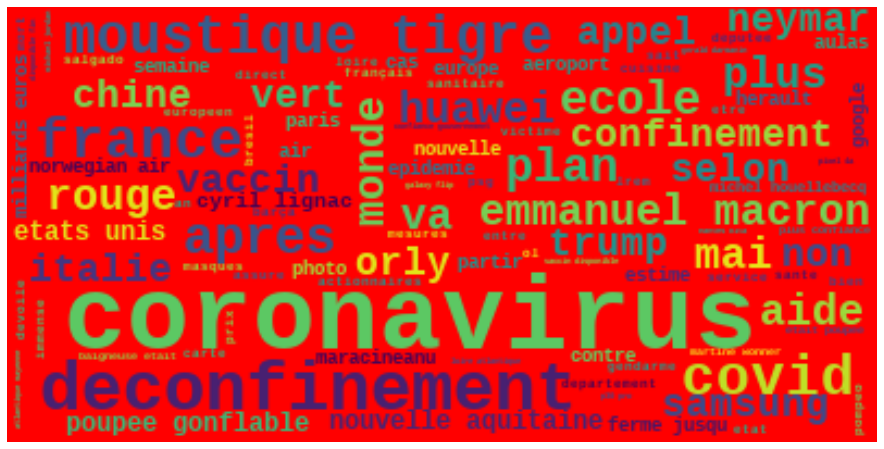

In [36]:
text = titres_modif

wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
                      stopwords=french_stop_words,
                      background_color="red",
                      min_word_length=0,
                      min_font_size=4)
wordcloud.generate(text)

plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()